In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import io
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad_suelo = ctrl.Antecedent(np.arange(0, 1024, 1), 'humedad_suelo')
tiempo_riego = ctrl.Consequent(np.arange(-2, 18, 1), 'tiempo_riego')

# Auto-membership function population is possible with .automf(3, 5, or 7)
humedad_suelo['seco'] = fuzz.trimf(humedad_suelo.universe, [0, 100, 200])
humedad_suelo['semi_seco'] = fuzz.trimf(humedad_suelo.universe, [120, 310, 500])
humedad_suelo['humedo'] = fuzz.trimf(humedad_suelo.universe, [450, 572, 694])
humedad_suelo['semi_humedo'] = fuzz.trimf(humedad_suelo.universe, [658, 725, 792])
humedad_suelo['encharcado'] = fuzz.trimf(humedad_suelo.universe, [750, 825, 900])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tiempo_riego['nada'] = fuzz.trimf(tiempo_riego.universe, [-2, -1, 0])
tiempo_riego['poco'] = fuzz.trimf(tiempo_riego.universe, [0, 2 , 4])
tiempo_riego['medio'] = fuzz.trimf(tiempo_riego.universe, [3, 6, 9])
tiempo_riego['bastante'] = fuzz.trimf(tiempo_riego.universe, [7, 9, 12])
tiempo_riego['mucho'] = fuzz.trapmf(tiempo_riego.universe, [10, 13, 17, 17])

C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


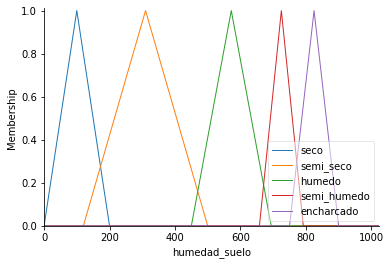

In [2]:
# You can see how these look with .view()
humedad_suelo.view()

C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


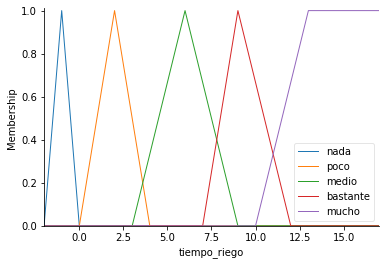

In [3]:
tiempo_riego.view()

IF humedad_suelo[encharcado] THEN tiempo_riego[nada]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

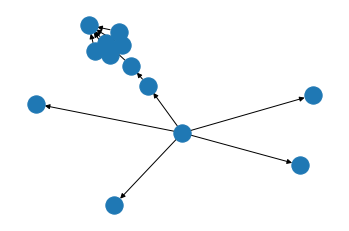

In [4]:
rule1 = ctrl.Rule(humedad_suelo['encharcado'], tiempo_riego['nada'])
rule2 = ctrl.Rule(humedad_suelo['semi_humedo'], tiempo_riego['poco'])
rule3 = ctrl.Rule(humedad_suelo['humedo'], tiempo_riego['medio'])
rule4 = ctrl.Rule(humedad_suelo['semi_seco'], tiempo_riego['bastante'])
rule5 = ctrl.Rule(humedad_suelo['seco'], tiempo_riego['mucho'])

print(rule1)

rule1.view()

## Control System Creation and Simulation.

Now that we have our rules defined, we can simply create a control system via:

In [5]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])

In order to simulate this control system, we will create a ControlSystemSimulation.
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [6]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [7]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['humedad_suelo'] = 150

# Crunch the numbers
tipping.compute()

Once computed, we can view the result as well as visualize it.

13.134792023190025


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


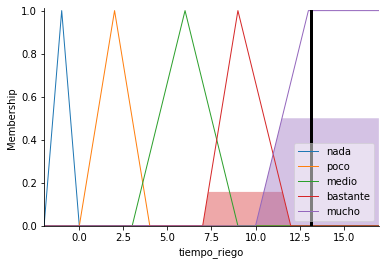

In [8]:
print (tipping.output['tiempo_riego'])
tiempo_riego.view(sim=tipping)



In [9]:
from gestion_riego.models import HistorialRiego

Fecha de Registro:  2020-12-26 17:00:20.133859
Humedad de Suelo:  179.65 Tiempo de Riego:  11.633893656291706
Fecha de Registro:  2020-12-26 12:00:19.991462
Humedad de Suelo:  488.80 Tiempo de Riego:  6.465634049245786
Fecha de Registro:  2020-12-26 08:00:20.005359
Humedad de Suelo:  455.80 Tiempo de Riego:  8.751893951604528
Fecha de Registro:  2020-12-25 17:00:19.784532
Humedad de Suelo:  441.24 Tiempo de Riego:  9.42739831398943
Fecha de Registro:  2020-12-25 12:00:20.866238
Humedad de Suelo:  265.50 Tiempo de Riego:  9.34814835596454
Fecha de Registro:  2020-12-25 08:00:20.882392
Humedad de Suelo:  53.26 Tiempo de Riego:  13.882296021673575
Fecha de Registro:  2020-12-24 17:00:20.642824
Humedad de Suelo:  474.25 Tiempo de Riego:  7.192627584250387
Fecha de Registro:  2020-12-24 12:00:20.831199
Humedad de Suelo:  486.61 Tiempo de Riego:  6.562200587713929


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-24 08:00:20.846877
Humedad de Suelo:  529.26 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-23 17:00:21.019488
Humedad de Suelo:  576.49 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-23 12:00:20.727796
Humedad de Suelo:  587.82 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-23 08:00:21.446390
Humedad de Suelo:  496.40 Tiempo de Riego:  6.14517311025121
Fecha de Registro:  2020-12-22 17:00:20.696744
Humedad de Suelo:  486.23 Tiempo de Riego:  6.5792620759542375
Fecha de Registro:  2020-12-22 12:00:21.103674
Humedad de Suelo:  481.76 Tiempo de Riego:  6.7885236712980275
Fecha de Registro:  2020-12-22 08:00:20.952748
Humedad de Suelo:  475.88 Tiempo de Riego:  7.09745601320669
Fecha de Registro:  2020-12-21 17:00:21.137536
Humedad de Suelo:  252.35 Tiempo de Riego:  9.356877614488475
Fecha de Registro:  2020-12-21 12:00:21.024410
Humedad de Suelo:  165.11 Tiempo de Riego:  12.50986429482059


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-21 08:00:20.935887
Humedad de Suelo:  382.00 Tiempo de Riego:  9.368046069371905
Fecha de Registro:  2020-12-20 17:00:20.756205
Humedad de Suelo:  357.05 Tiempo de Riego:  9.349716748631757
Fecha de Registro:  2020-12-20 12:00:20.408007
Humedad de Suelo:  91.06 Tiempo de Riego:  14.127759794820825
Fecha de Registro:  2020-12-20 08:00:20.723717
Humedad de Suelo:  135.85 Tiempo de Riego:  13.602435946055493
Fecha de Registro:  2020-12-19 17:00:20.540806
Humedad de Suelo:  424.08 Tiempo de Riego:  9.408418874072842
Fecha de Registro:  2020-12-19 12:00:20.642246
Humedad de Suelo:  447.33 Tiempo de Riego:  9.434414483264648


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-19 08:00:20.810332
Humedad de Suelo:  411.75 Tiempo de Riego:  9.39558960597724
Fecha de Registro:  2020-12-18 17:00:20.705485
Humedad de Suelo:  384.77 Tiempo de Riego:  9.370376757980612
Fecha de Registro:  2020-12-18 12:00:20.830969
Humedad de Suelo:  382.04 Tiempo de Riego:  9.368079345057806
Fecha de Registro:  2020-12-18 08:00:20.518686
Humedad de Suelo:  252.84 Tiempo de Riego:  9.356524969974702
Fecha de Registro:  2020-12-17 17:00:20.772283
Humedad de Suelo:  218.55 Tiempo de Riego:  9.385463763779674
Fecha de Registro:  2020-12-17 12:00:20.315558
Humedad de Suelo:  429.53 Tiempo de Riego:  9.414313046775499
Fecha de Registro:  2020-12-17 08:00:20.600284
Humedad de Suelo:  424.75 Tiempo de Riego:  9.409136407466574
Fecha de Registro:  2020-12-16 17:00:20.143702
Humedad de Suelo:  420.66 Tiempo de Riego:  9.40478803707866


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-16 08:00:20.188970
Humedad de Suelo:  179.32 Tiempo de Riego:  11.658881360548689
Fecha de Registro:  2020-12-15 17:00:20.305405
Humedad de Suelo:  401.43 Tiempo de Riego:  9.385444667615454
Fecha de Registro:  2020-12-15 12:00:20.673008
Humedad de Suelo:  421.68 Tiempo de Riego:  9.405865297026711
Fecha de Registro:  2020-12-15 08:00:20.876511
Humedad de Suelo:  397.21 Tiempo de Riego:  9.381466986520447
Fecha de Registro:  2020-12-14 17:00:20.890493
Humedad de Suelo:  184.90 Tiempo de Riego:  11.202916531602773
Fecha de Registro:  2020-12-14 12:00:20.668647
Humedad de Suelo:  169.15 Tiempo de Riego:  12.311045572504172
Fecha de Registro:  2020-12-14 08:00:20.821812
Humedad de Suelo:  454.61 Tiempo de Riego:  8.882202213882309
Fecha de Registro:  2020-12-13 17:00:20.679199
Humedad de Suelo:  470.86 Tiempo de Riego:  7.408680915257574
Fecha de Registro:  2020-12-13 12:00:20.816687
Humedad de Suelo:  468.38 Tiempo de Riego:  7.593413277308669


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-13 08:00:20.256669
Humedad de Suelo:  479.96 Tiempo de Riego:  6.878266234404963
Fecha de Registro:  2020-12-12 17:00:20.166082
Humedad de Suelo:  468.20 Tiempo de Riego:  7.607926568720275
Fecha de Registro:  2020-12-12 12:00:20.149844
Humedad de Suelo:  467.93 Tiempo de Riego:  7.629778637692669
Fecha de Registro:  2020-12-12 08:00:20.039997
Humedad de Suelo:  465.33 Tiempo de Riego:  7.845655490125838
Fecha de Registro:  2020-12-11 17:00:20.187106
Humedad de Suelo:  476.72 Tiempo de Riego:  7.050264142039739
Fecha de Registro:  2020-12-11 12:00:20.401839
Humedad de Suelo:  437.58 Tiempo de Riego:  9.423249378247558


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-11 08:00:19.904304
Humedad de Suelo:  468.08 Tiempo de Riego:  7.617626338744925
Fecha de Registro:  2020-12-10 17:00:19.224648
Humedad de Suelo:  446.78 Tiempo de Riego:  9.433775222989231
Fecha de Registro:  2020-12-10 12:00:20.130837
Humedad de Suelo:  127.29 Tiempo de Riego:  13.854937303701215
Fecha de Registro:  2020-12-10 08:00:20.194769
Humedad de Suelo:  278.93 Tiempo de Riego:  9.3409941988685
Fecha de Registro:  2020-12-09 17:00:20.292314
Humedad de Suelo:  531.96 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-09 12:00:20.452849
Humedad de Suelo:  526.84 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-09 08:00:20.096282
Humedad de Suelo:  536.94 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-08 17:00:19.988492
Humedad de Suelo:  535.19 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-08 12:00:20.334997
Humedad de Suelo:  534.02 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-08 08:

C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\

Fecha de Registro:  2020-12-07 13:35:20.024538
Humedad de Suelo:  542.13 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-07 08:00:20.109150
Humedad de Suelo:  517.58 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-06 17:00:02.901579
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434
Fecha de Registro:  2020-12-06 17:00:02.722864
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434
Fecha de Registro:  2020-12-06 17:00:02.694938
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434
Fecha de Registro:  2020-12-06 15:48:20.752262
Humedad de Suelo:  455.22 Tiempo de Riego:  8.814814984492834
Fecha de Registro:  2020-12-06 15:48:20.567617
Humedad de Suelo:  455.22 Tiempo de Riego:  8.814814984492834
Fecha de Registro:  2020-12-06 15:48:20.563655
Humedad de Suelo:  455.22 Tiempo de Riego:  8.814814984492834
Fecha de Registro:  2020-12-06 12:36:42.594782
Humedad de Suelo:  540.19 Tiempo de Riego:  6.000000000000001


C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\casaortiz\django\smartnature\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


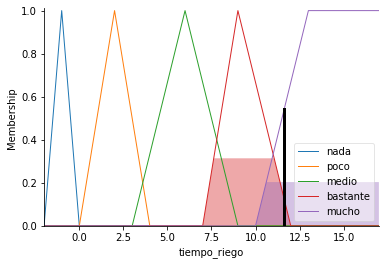

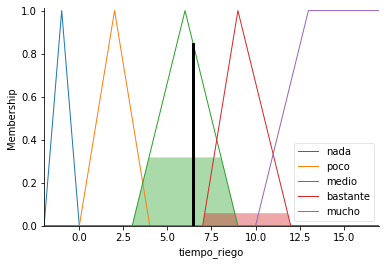

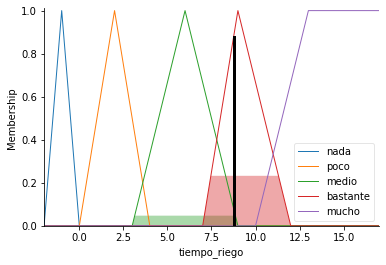

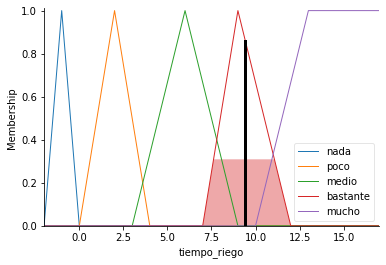

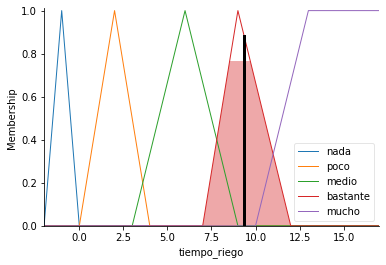

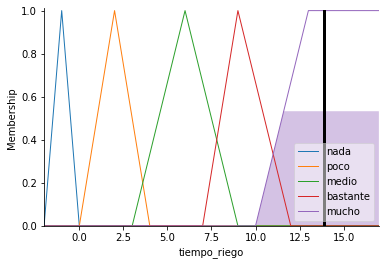

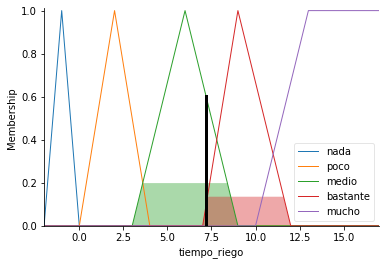

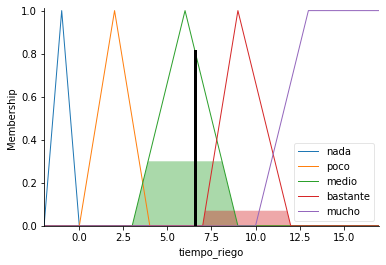

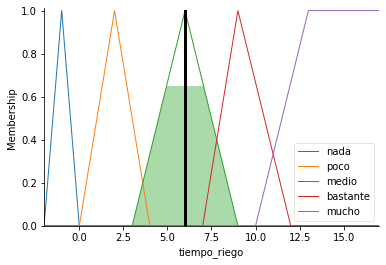

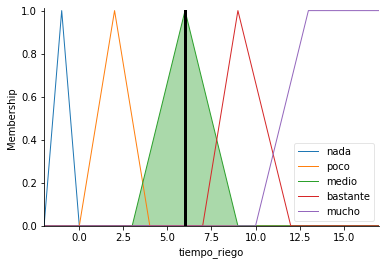

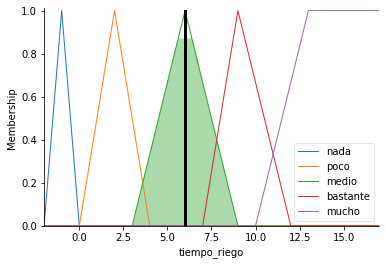

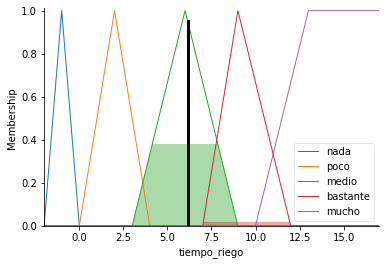

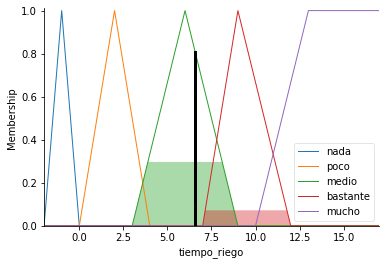

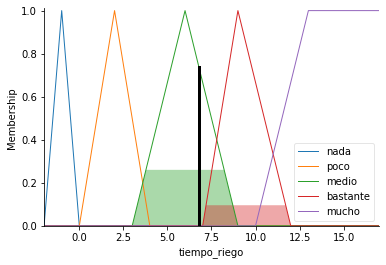

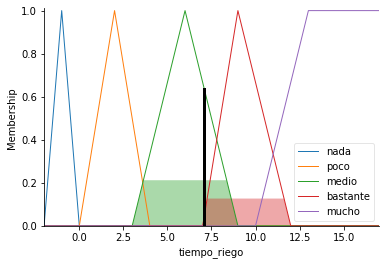

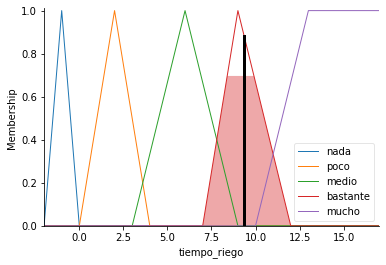

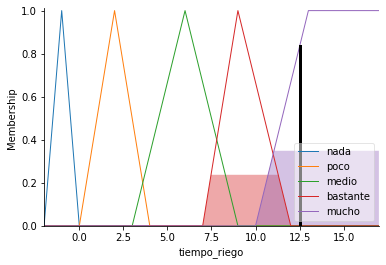

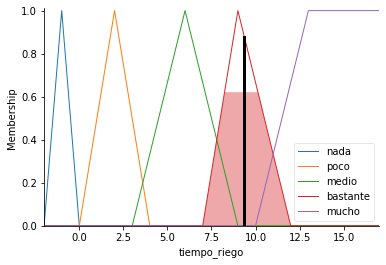

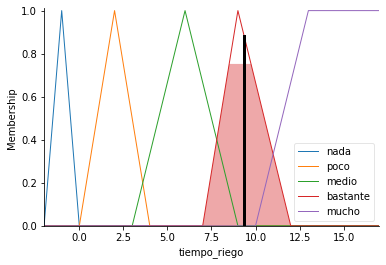

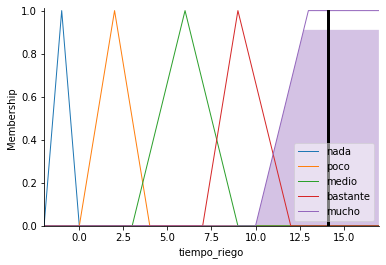

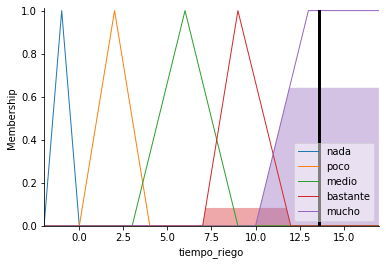

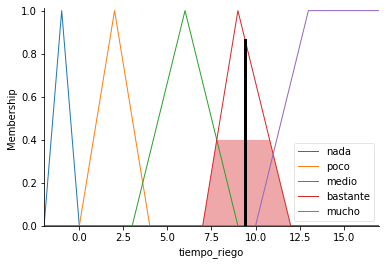

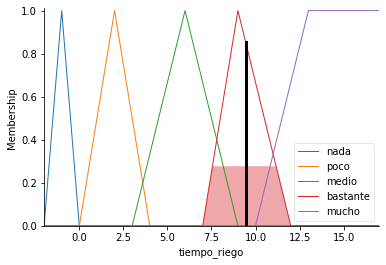

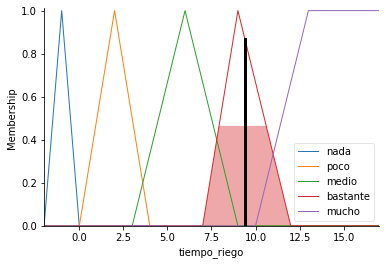

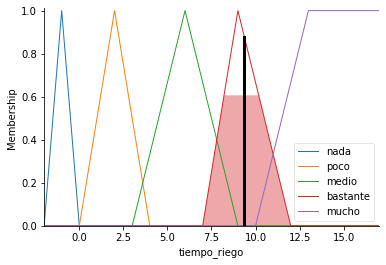

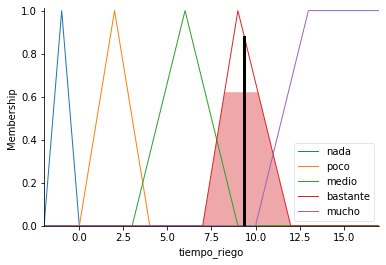

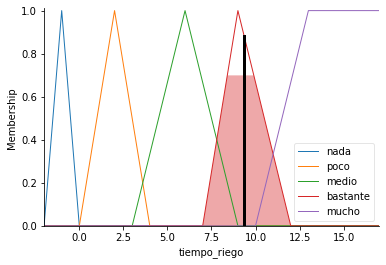

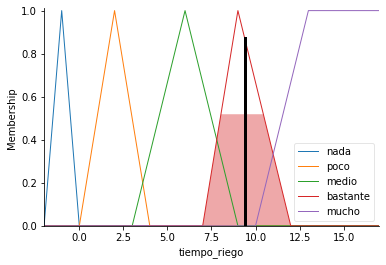

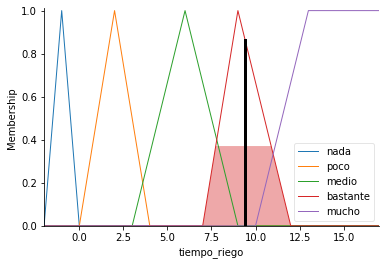

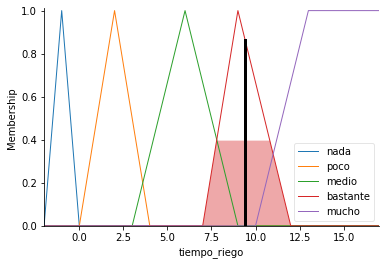

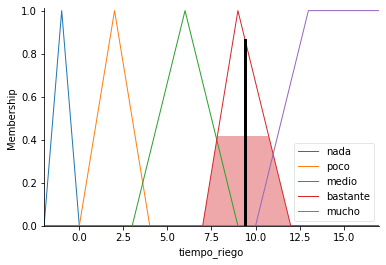

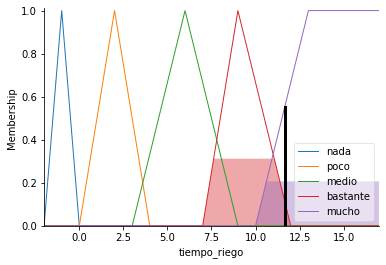

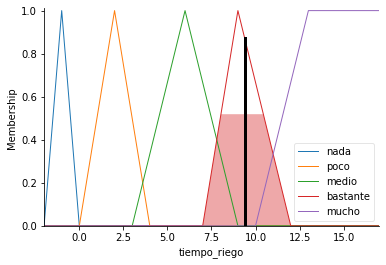

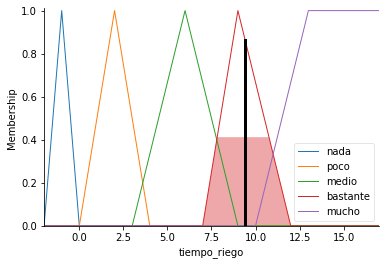

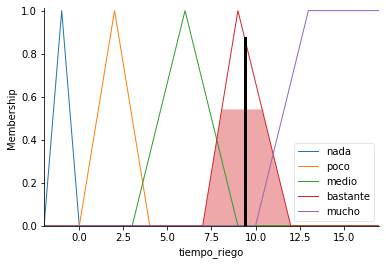

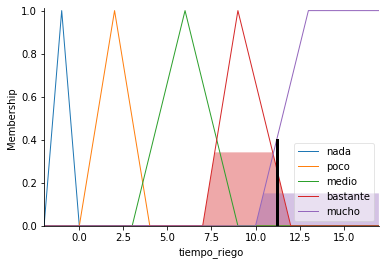

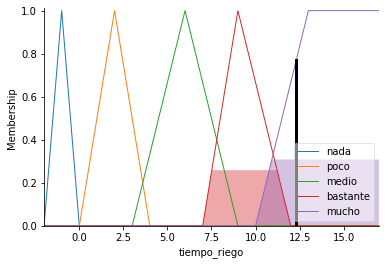

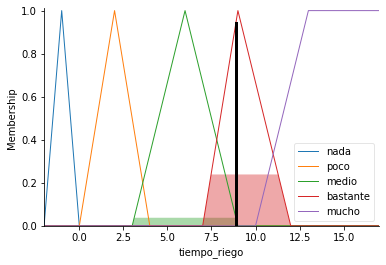

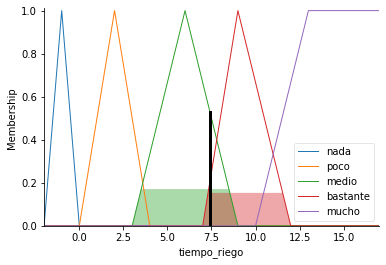

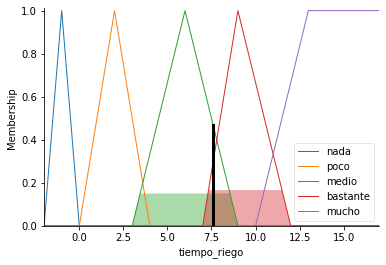

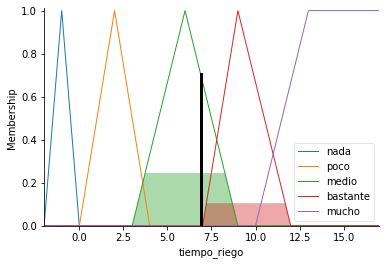

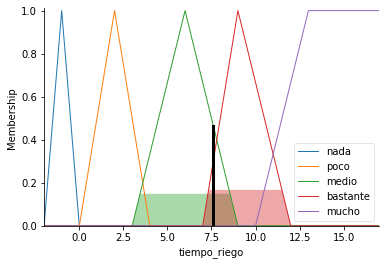

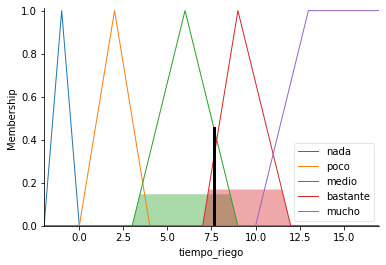

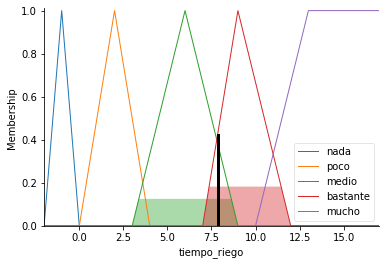

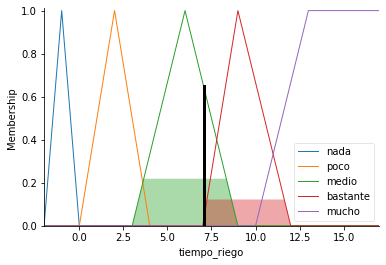

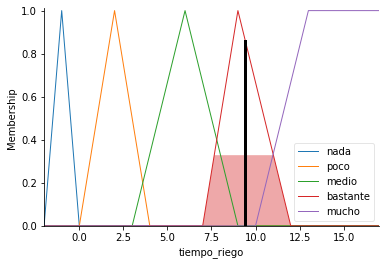

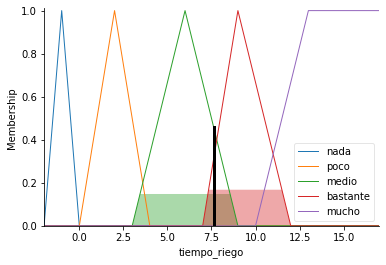

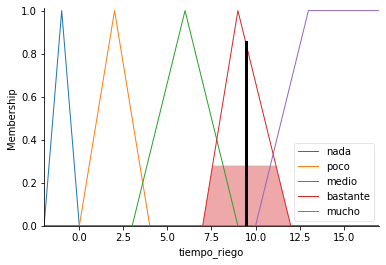

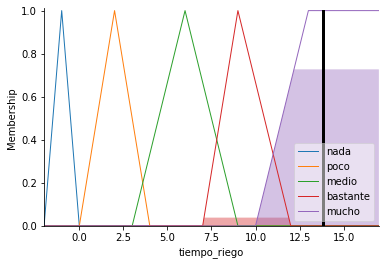

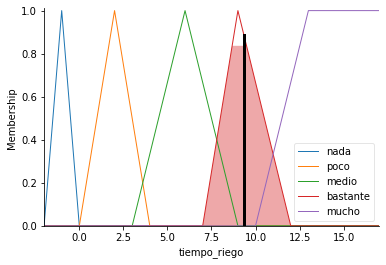

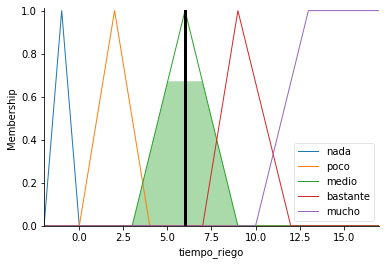

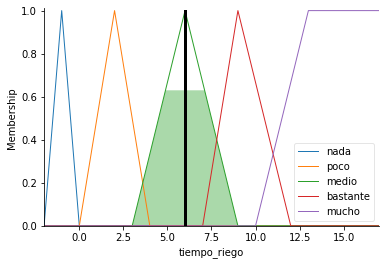

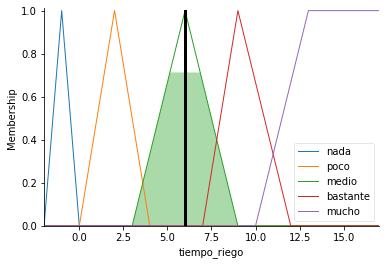

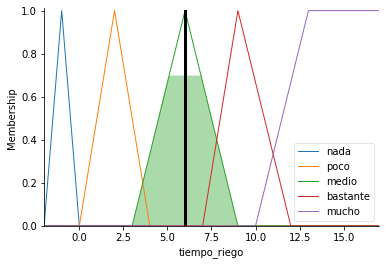

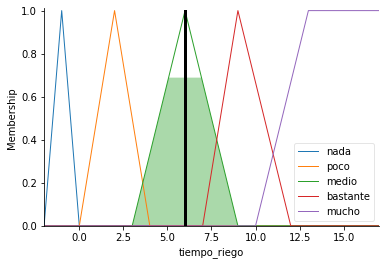

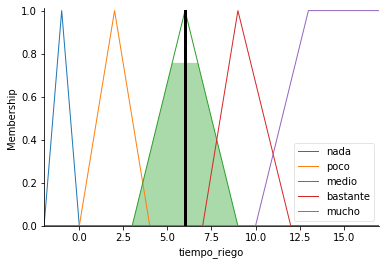

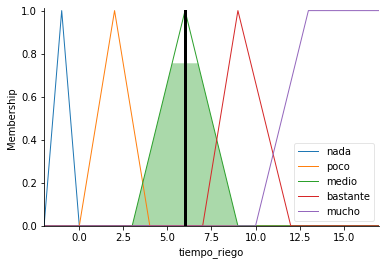

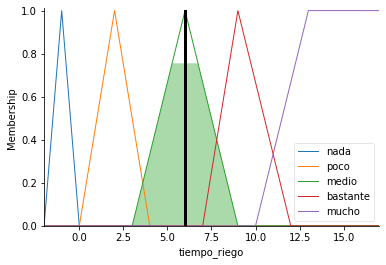

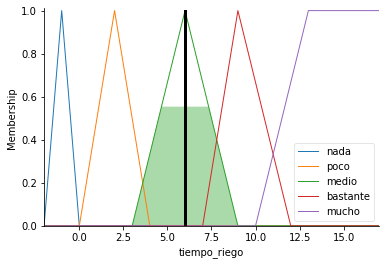

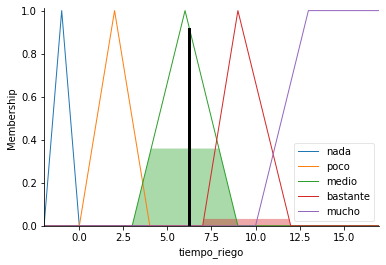

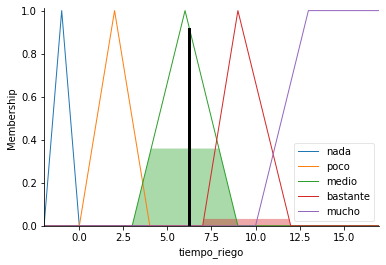

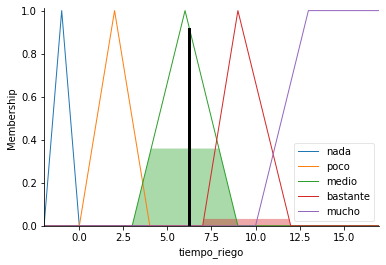

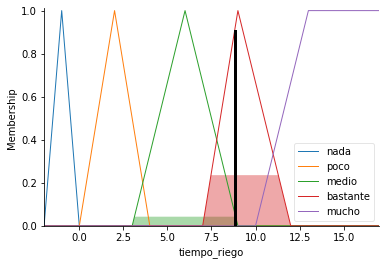

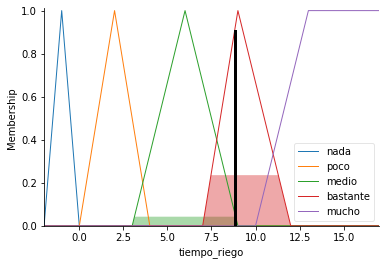

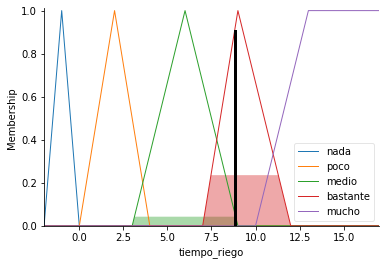

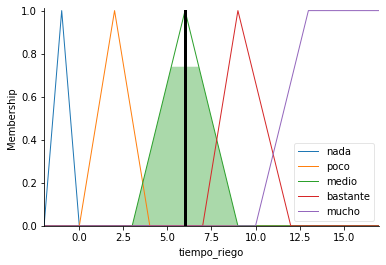

In [10]:
historial = HistorialRiego.objects.filter(codigo_sensor = 5)
for h in historial:
    
    try:
        tipping.input['humedad_suelo'] = float(h.valor_humed_suelo)
        tipping.compute()
        print("Fecha de Registro: ", h.fecha_riego)
        print("Humedad de Suelo: ",h.valor_humed_suelo, "Tiempo de Riego: ", tipping.output['tiempo_riego'])
        tiempo_riego.view(sim=tipping)
        
    except:
        pass
    